ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2107 HMDS data farm connection is inactive but should be available upon demand.ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefil
ERROR -1 2106 HMDS data farm connection is OK:ushmds


Date: 20190903, Open: 49.0, High: 52.125, Low: 49.0, Close: 51.5
Date: 20190904, Open: 51.83, High: 52.37, Low: 51.7525, Close: 52.2625
Date: 20190905, Open: 54.7175, High: 54.7175, Low: 52.655, Close: 53.4075
Date: 20190906, Open: 50.0625, High: 53.605, Low: 49.5425, Close: 53.415
Date: 20190909, Open: 49.6575, High: 54.11, Low: 49.655, Close: 53.6325
Date: 20190910, Open: 54.255, High: 54.37, Low: 51.895, Close: 54.2175
Date: 20190911, Open: 54.0, High: 59.03, Low: 53.455, Close: 56.405
Date: 20190912, Open: 52.61, High: 56.595, Low: 52.6075, Close: 55.845
Date: 20190913, Open: 56.2125, High: 56.2125, Low: 54.255, Close: 54.6225
Date: 20190916, Open: 50.0225, High: 55.075, Low: 50.0225, Close: 55.075
Date: 20190917, Open: 51.875, High: 55.24, Low: 51.875, Close: 55.225
Date: 20190918, Open: 53.735, High: 55.745, Low: 52.475, Close: 55.6025
Date: 20190919, Open: 55.9125, High: 55.9425, Low: 55.0925, Close: 55.27
Date: 20190920, Open: 56.7775, High: 56.7775, Low: 54.3675, Close: 54.422

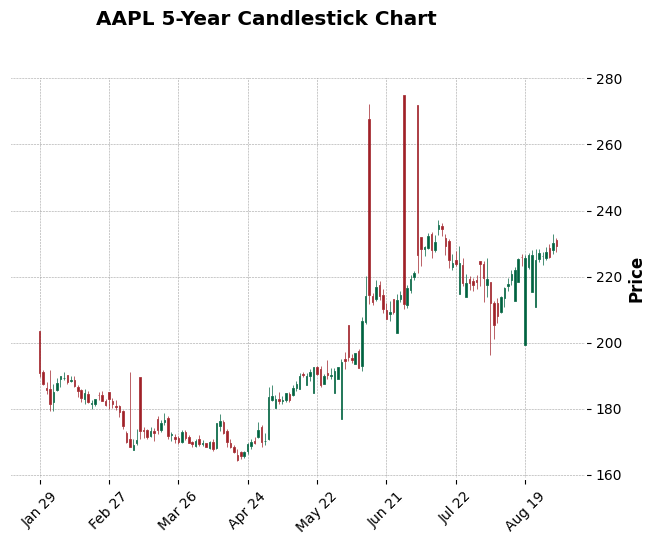

In [1]:
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
from ibapi.common import *  # For HistoricalData
import threading
import time
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

class IBapi(EWrapper, EClient):
    def __init__(self):
        EClient.__init__(self, self)
        self.data = []  # Initialize a list to store the data

    def historicalData(self, reqId, bar):
        # Append the bar data to the list
        self.data.append([bar.date, bar.open, bar.high, bar.low, bar.close])
        print(f"Date: {bar.date}, Open: {bar.open}, High: {bar.high}, Low: {bar.low}, Close: {bar.close}")

    def historicalDataEnd(self, reqId: int, start: str, end: str):
        print("Historical data received.")
        self.disconnect()

def run_loop():
    app.run()

# Create an instance of the IBapi class
app = IBapi()
app.connect('127.0.0.1', 4002, 123)

# Start the socket in a thread
api_thread = threading.Thread(target=run_loop, daemon=True)
api_thread.start()

time.sleep(1)  # Sleep interval to allow time for connection to server

# Create contract object for AAPL
apple_contract = Contract()
apple_contract.symbol = 'AAPL'
apple_contract.secType = 'STK'
apple_contract.exchange = 'SMART'
apple_contract.currency = 'USD'

# Request historical data
app.reqHistoricalData(1, apple_contract, '', '5 Y', '1 day', 'MIDPOINT', 0, 1, False, [])

# Wait for data to be returned
time.sleep(60)
app.disconnect()

# Convert the data to a DataFrame
df = pd.DataFrame(app.data, columns=['Date', 'Open', 'High', 'Low', 'Close'])
#df['Date'] = pd.to_datetime(df['Date'])  # Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d') #%H:%M:%S')
df.set_index('Date', inplace=True)  # Set Date as index

# Plot using mplfinance
mpf.plot(df[-150:], type='candle', style='charles', title='AAPL 5-Year Candlestick Chart',
         ylabel='Price', volume=False)


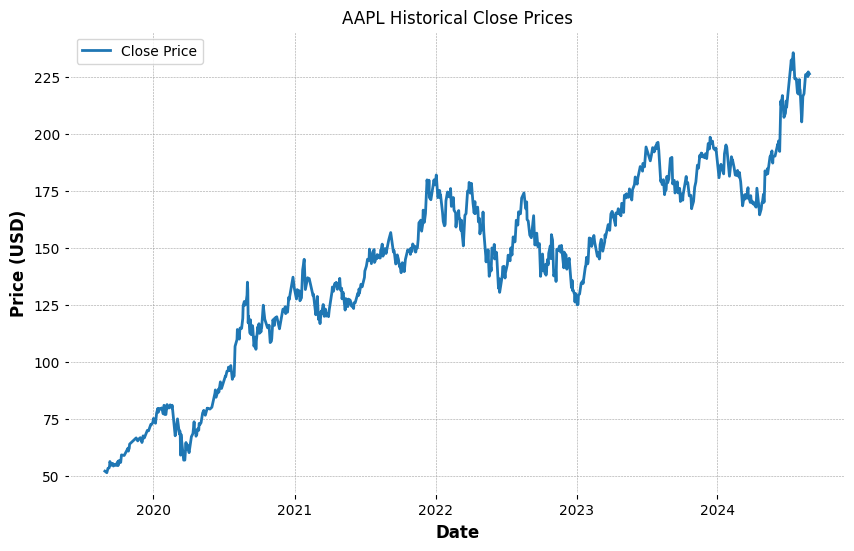

In [35]:
# Convert the list to a Pandas DataFrame
df = pd.DataFrame(app.data, columns=['Date', 'Open', 'High', 'Low', 'Close'])

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d') #%H:%M:%S')
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('AAPL Historical Close Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [20]:
filename='AAPL_5year.csv'
df.to_csv(filename)
print(f"Data saved to {filename}")

Data saved to AAPL_5year.csv


ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefil


Date: 20190829, Open: 46.8125, High: 52.3325, Low: 46.8125, Close: 52.1925
Date: 20190830, Open: 49.125, High: 52.8875, Low: 49.125, Close: 52.02
Date: 20190903, Open: 49.0, High: 52.125, Low: 49.0, Close: 51.5
Date: 20190904, Open: 51.83, High: 52.37, Low: 51.7525, Close: 52.2625
Date: 20190905, Open: 54.7175, High: 54.7175, Low: 52.655, Close: 53.4075
Date: 20190906, Open: 50.0625, High: 53.605, Low: 49.5425, Close: 53.415
Date: 20190909, Open: 49.6575, High: 54.11, Low: 49.655, Close: 53.6325
Date: 20190910, Open: 54.255, High: 54.37, Low: 51.895, Close: 54.2175
Date: 20190911, Open: 54.0, High: 59.03, Low: 53.455, Close: 56.405
Date: 20190912, Open: 52.61, High: 56.595, Low: 52.6075, Close: 55.845
Date: 20190913, Open: 56.2125, High: 56.2125, Low: 54.255, Close: 54.6225
Date: 20190916, Open: 50.0225, High: 55.075, Low: 50.0225, Close: 55.075
Date: 20190917, Open: 51.875, High: 55.24, Low: 51.875, Close: 55.225
Date: 20190918, Open: 53.735, High: 55.745, Low: 52.475, Close: 55.6025


C:\Users\Yodyium\AppData\Roaming\Python\Python312\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


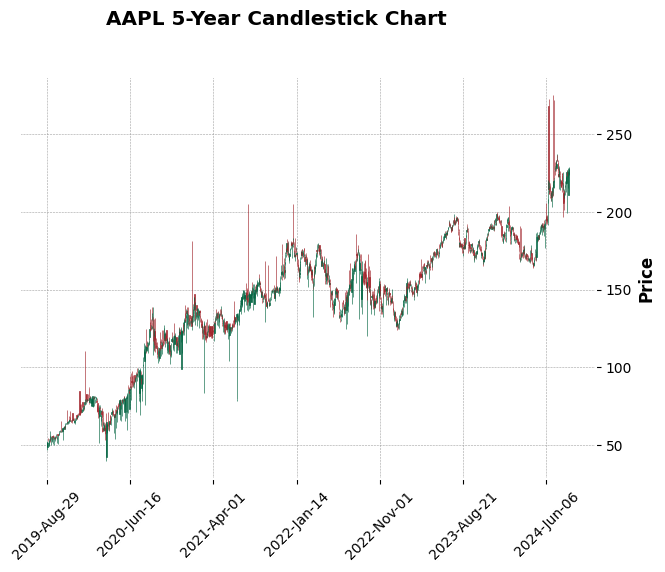

In [30]:
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
from ibapi.common import *  # For HistoricalData
import threading
import time
import pandas as pd
import mplfinance as mpf

class IBapi(EWrapper, EClient):
    def __init__(self):
        EClient.__init__(self, self)
        self.data = []  # Initialize a list to store the data

    def historicalData(self, reqId, bar):
        # Append the bar data to the list
        self.data.append([bar.date, bar.open, bar.high, bar.low, bar.close])
        print(f"Date: {bar.date}, Open: {bar.open}, High: {bar.high}, Low: {bar.low}, Close: {bar.close}")

    def historicalDataEnd(self, reqId: int, start: str, end: str):
        print("Historical data received.")
        self.disconnect()

def run_loop():
    app.run()

# Create an instance of the IBapi class
app = IBapi()
app.connect('127.0.0.1', 4002, 123)

# Start the socket in a thread
api_thread = threading.Thread(target=run_loop, daemon=True)
api_thread.start()

time.sleep(1)  # Sleep interval to allow time for connection to server

# Create contract object for AAPL
apple_contract = Contract()
apple_contract.symbol = 'AAPL'
apple_contract.secType = 'STK'
apple_contract.exchange = 'SMART'
apple_contract.currency = 'USD'

# Request historical data
app.reqHistoricalData(1, apple_contract, '', '5 Y', '1 day', 'MIDPOINT', 0, 1, False, [])

# Wait for data to be returned
time.sleep(60)
# Disconnect the API
app.disconnect()





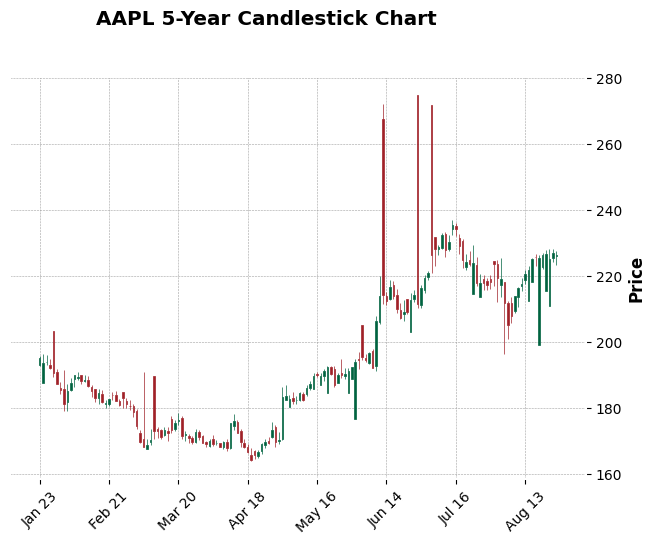

In [38]:
# Convert the data to a DataFrame
df = pd.DataFrame(app.data, columns=['Date', 'Open', 'High', 'Low', 'Close'])
#df['Date'] = pd.to_datetime(df['Date'])  # Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d') #%H:%M:%S')
df.set_index('Date', inplace=True)  # Set Date as index

# Plot using mplfinance
mpf.plot(df[-150:], type='candle', style='charles', title='AAPL 5-Year Candlestick Chart',
         ylabel='Price', volume=False)



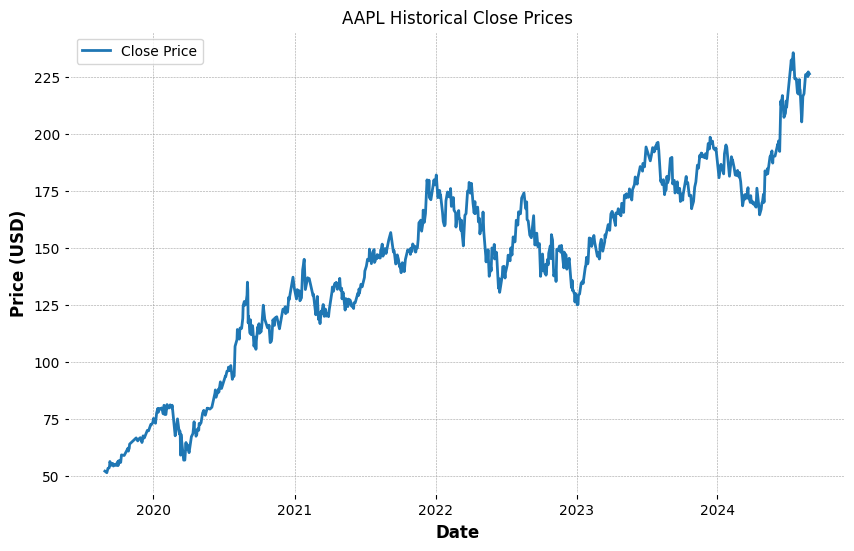

In [39]:
# Convert the list to a Pandas DataFrame
df = pd.DataFrame(app.data, columns=['Date', 'Open', 'High', 'Low', 'Close'])

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d') #%H:%M:%S')
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('AAPL Historical Close Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefil
ERROR 1 2176 Warning: Your API version does not support fractional share size rules. Please upgrade to a minimum version 163. Trimmed value 611524.68 to 611524


Date: 20190903, Open: 51.605, High: 51.745, Low: 51.055, Close: 51.425, Volume: 611524, Open Interest: 77973
Date: 20190904, Open: 52.095, High: 52.37, Low: 51.83, Close: 52.2975, Volume: 507273, Open Interest: 66572
Date: 20190905, Open: 52.9875, High: 53.4925, Low: 52.8775, Close: 53.32, Volume: 667231, Open Interest: 88352
Date: 20190906, Open: 53.495, High: 53.605, Low: 53.1275, Close: 53.315, Volume: 546756, Open Interest: 76345
Date: 20190909, Open: 53.715, High: 54.11, Low: 52.7675, Close: 53.5425, Volume: 738047, Open Interest: 97618
Date: 20190910, Open: 53.4525, High: 54.195, Low: 52.9275, Close: 54.175, Volume: 869951, Open Interest: 107962
Date: 20190911, Open: 54.505, High: 55.91, Low: 54.4325, Close: 55.8975, Volume: 1364872, Open Interest: 171433
Date: 20190912, Open: 56.2, High: 56.605, Low: 55.715, Close: 55.7725, Volume: 925486, Open Interest: 116631
Date: 20190913, Open: 55.015, High: 55.1975, Low: 54.255, Close: 54.6875, Volume: 1176572, Open Interest: 145684
Date: 

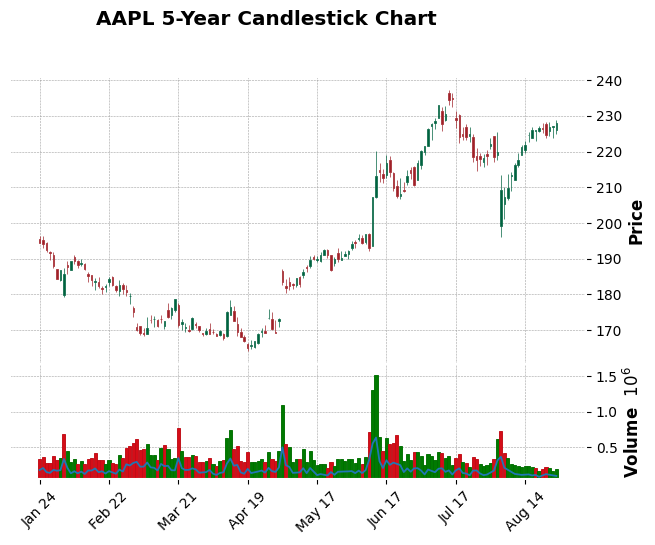

In [5]:
import datetime
import pandas as pd
import mplfinance as mpf
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
from threading import Thread, Event

class IBKRClient(EWrapper, EClient):
    def __init__(self):
        EClient.__init__(self, self)
        self.data = []
        self.data_ready = Event()

    def historicalData(self, reqId, bar):
        # Collecting OHLC, Volume, and Open Interest data
        self.data.append([bar.date, bar.open, bar.high, bar.low, bar.close, bar.volume, bar.barCount])
        print(f"Date: {bar.date}, Open: {bar.open}, High: {bar.high}, Low: {bar.low}, Close: {bar.close}, Volume: {bar.volume}, Open Interest: {bar.barCount}")

    def historicalDataEnd(self, reqId: int, start: str, end: str):
        print("Historical data received.")
        self.data_ready.set()

def fetch_historical_data(client, contract, duration, bar_size, end_date=None):
    if end_date is None:
        end_date = datetime.datetime.now().strftime("%Y%m%d-%H:%M:%S")
    client.data = []
    client.data_ready.clear()
    client.reqHistoricalData(
        reqId=1,
        contract=contract,
        endDateTime=end_date,
        durationStr=duration,
        barSizeSetting=bar_size,
        whatToShow="TRADES",
        useRTH=1,
        formatDate=1,
        keepUpToDate=False,
        chartOptions=[]
    )
    client.data_ready.wait()
    return pd.DataFrame(client.data, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest'])

def create_contract(symbol, sec_type, exchange, currency):
    contract = Contract()
    contract.symbol = symbol
    contract.secType = sec_type
    contract.exchange = exchange
    contract.currency = currency
    return contract


# Initialize IBKR client
client = IBKRClient()
client.connect("127.0.0.1", 4002, clientId=1)

# Run the client in a separate thread
client_thread = Thread(target=client.run)
client_thread.start()

contract = create_contract("AAPL", "STK", "SMART", "USD")
    
# Fetch historical data with Volume and Open Interest
df = fetch_historical_data(client, contract, duration="5 Y", bar_size="1 day")
    
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df.set_index('Date', inplace=True)

client.disconnect()

# Ensure the client thread finishes
client_thread.join()

# Check and handle any missing data
df = df.dropna()

# Slice the last 150 records for plotting
df_last = df[-150:]

# Plot the data using mplfinance




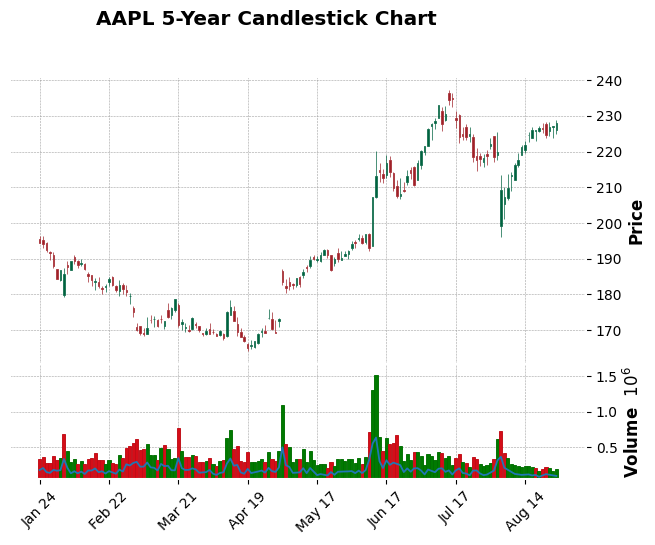

Data saved to AAPL_5year.csv


In [6]:
mpf.plot(df_last, type='candle', style='charles', title='AAPL 5-Year Candlestick Chart',
         ylabel='Price', volume=True, addplot=mpf.make_addplot(df_last['Open Interest'], panel=1, ylabel='Open Interest'))

filename='AAPL_5year.csv'
df.to_csv(filename)
print(f"Data saved to {filename}")

ValueError: x and y must have same first dimension, but have shapes (150,) and (1255,)

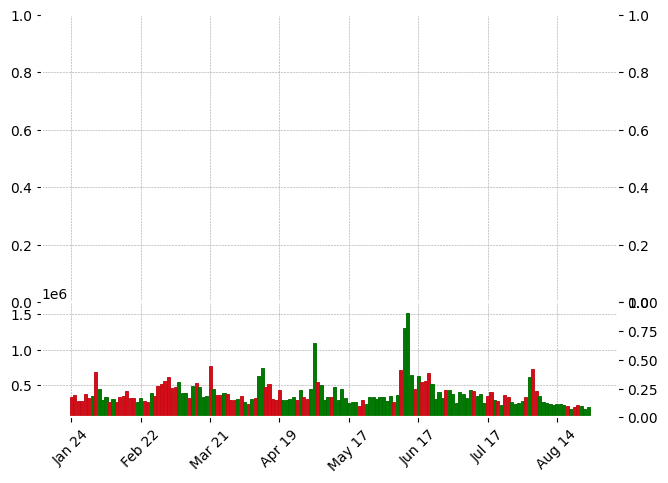

In [2]:
client.disconnect()

    # Ensure the client thread finishes
client_thread.join()


NameError: name 'client' is not defined